
# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

1- In this project we’ll be analyzing TMDb data set which includes information about 10,000 movies with their details of budget, revenue, release date, cast etc.  We will try to answer the following questions:


Questions : 

1- What is the most profitable ten movies?

2- Total Profits made by all movies

3- How does popularity change according to their budget?

4- What kinds of properties are associated with movies that have high profit?



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [50]:
raw_tmdb = pd.read_csv("tmdb-movies.csv")
    
df1=raw_tmdb.copy()

df1.info()

df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47
5,281957,tt1663202,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20,2015,124199945.35,490314247.02
6,87101,tt1340138,8.65,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80,2015,142599937.26,405355075.68
7,286217,tt3659388,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60,2015,99359956.28,547749654.31
8,211672,tt2293640,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50,2015,68079970.04,1064192016.80
9,150540,tt2096673,6.33,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.00,2015,160999929.16,

We will be analyzing a dataframe which 10866 entries and 21 columns. There are lots of missing values, especially in homepage, tagline, and keyword columns. However, our questions does not related with those. Data type of release_date is not datetime, object instead which we will be fix. Lastly, multiple values in "genres", "cast" and "director" are seperated with "|" character.



In [51]:
#Statistical Summary
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [52]:
#Turn values from scientific notation to decimal format:

pd.options.display.float_format = '{:.2f}'.format

df1.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


#### Observations

<ul>

<li>Budget and runtime has zero values.</li> 
    <li>Standart Deviation in budget, revenue, budget_adj and revenue_adj columns are too high. Which means we have a wide range within them.</li>
    <li>There is no profit column.</li>


### Data Cleaning

#### Specifications

In "Data Cleaning" part, main changes that will be implemented are as follows:

1- Unnecessary columns will be dropped.

2- Datetime issue that we mentioned above will be fixed.

3- Null values will be checked and filled or removed if necessary.

4- Duplicated values will be removed.

5- Profit column will be added to answer the questions in the following parts.

In [53]:
#Drop unnecessary columns

df1.drop(df1.columns.difference(["original_title","cast", "director", "popularity", "release_date", "release_year", "genres", "budget", "budget_adj", "revenue", "revenue_adj", "runtime", "vote_count", "vote_average", "production companies"]), 1, inplace=True)


In [54]:
#Change Columns Name

df1.rename(columns={"production_companies": "pcompanies","original_title": "title", "release_date": "rdate", "release_year": "ryear"}, inplace=True)


In [55]:
#Change Data Type of release date raw

df1['rdate'] = pd.to_datetime(df1.rdate)


In [56]:
#Check Null Values

df1.isnull().sum()

popularity       0
budget           0
revenue          0
title            0
cast            76
director        44
runtime          0
genres          23
rdate            0
vote_count       0
vote_average     0
ryear            0
budget_adj       0
revenue_adj      0
dtype: int64

There are some null values in "cast", "director" and "genres" columns which we will be adress later. 

In [57]:
#Drop Duplicated Values
df1.drop_duplicates(keep = 'first', inplace = True)


In [58]:
#Lets look out our data info

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10865 non-null  float64       
 1   budget        10865 non-null  int64         
 2   revenue       10865 non-null  int64         
 3   title         10865 non-null  object        
 4   cast          10789 non-null  object        
 5   director      10821 non-null  object        
 6   runtime       10865 non-null  int64         
 7   genres        10842 non-null  object        
 8   rdate         10865 non-null  datetime64[ns]
 9   vote_count    10865 non-null  int64         
 10  vote_average  10865 non-null  float64       
 11  ryear         10865 non-null  int64         
 12  budget_adj    10865 non-null  float64       
 13  revenue_adj   10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.2+ MB


There are 10865 entries left. So we had one duplicated row before process.


#### Adding a Profit Column

Before adding profit column we need to be sure to drop movies that have zero budgets to avoid miscalculations 

In [59]:
#reference: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

df2 = df1[ df1["budget"] == 0 ].index

df1.drop(df2 , inplace=True)

In [60]:
#Simple formula to calculate profit in this dataset : Budget_adj - revenue_adj.
#Adjusted values will be choosen for getting close to the actual profit or adjusted profit in other words.

df1['profit'] = df1.revenue_adj - df1.budget_adj


##### Lets look out our Final Data<a id='df1'></a>


In [61]:
#Final Data 

df1.head(6)

,popularity,budget,revenue,title,cast,director,runtime,genres,rdate,vote_count,vote_average,ryear,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.47,271619025.41,170419069.94
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.04,1902723129.80,1718723210.76
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.09,1385748801.47,1210948878.38
5,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.20,2015,124199945.35,490314247.02,366114301.67


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1- What is the most profitable ten movies?


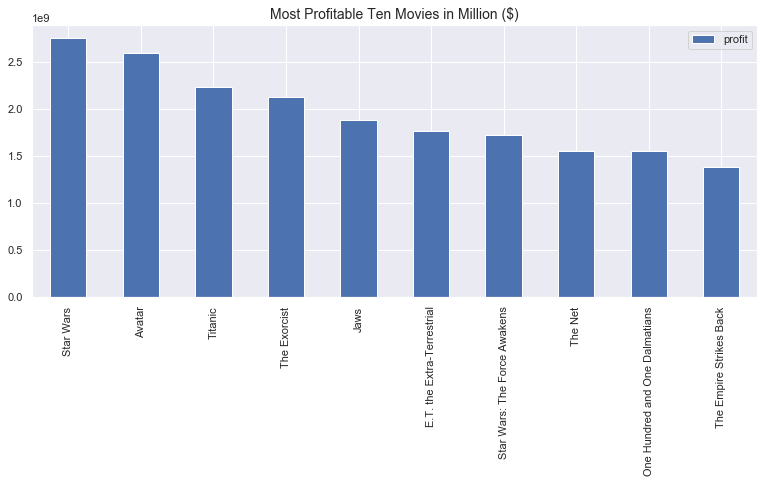

In [63]:
ax = df1.nlargest(10,['profit']) . plot(kind = "bar", x="title", y="profit")

ax.xaxis.label.set_visible(False)

plt.title("Most Profitable Ten Movies in Million ($)", fontsize = 14)

sns.set(rc={'figure.figsize':(13,5)})




### Question 2  - What is the total profits made by all movies?

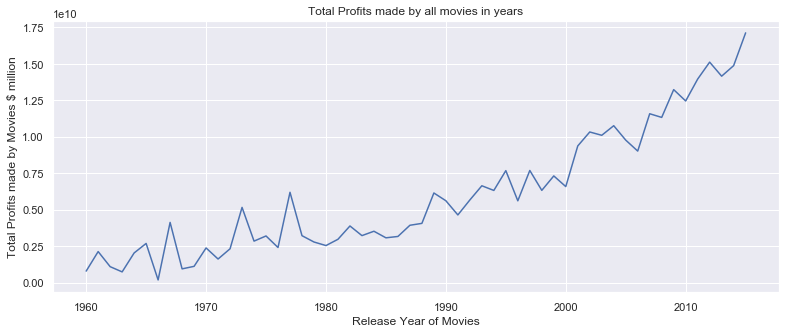

In [64]:
#if we want to know the profits of movies for each year we should group the movies for years.

#Lets set a dataframe for that group function and visualize the question:

yearbyprofits = df1.groupby('ryear')['profit'].sum()

plt.xlabel('Release Year of Movies', fontsize = 12)

plt.ylabel('Total Profits made by Movies $ million', fontsize = 12)

plt.title('Total Profits made by all movies in years')

plt.plot(yearbyprofits)

plt.show()



### Question 3 - How does popularity change according to the budget ?

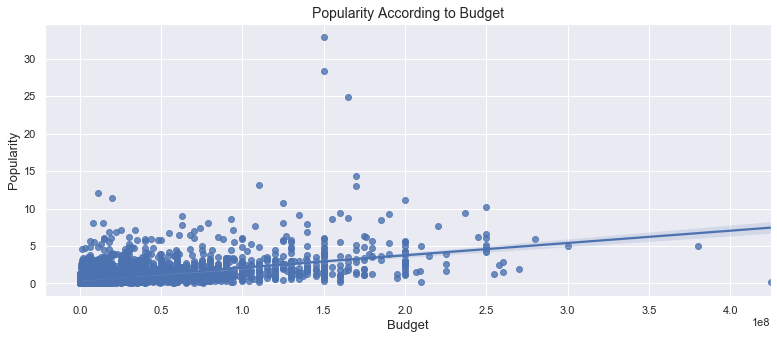

In [65]:
#We use "regplot" function to make a scatterplot between "budget and popularity".

ax = sns.regplot(x=df1['budget'], y=df1['popularity'])
ax.set_title("Popularity According to Budget",fontsize=14)
ax.set_xlabel("Budget",fontsize=13)
ax.set_ylabel("Popularity",fontsize=13)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")


In [66]:
#Lets Find correlation coefficient to observe correlation between budget and Popularity

q3_corr = df1.corr()

print("Correlation Coefficient Between Popularity and Budget : ",q3_corr.loc['budget','popularity'])

Correlation Coefficient Between Popularity and Budget :  0.4799612326359372


### Question 4 - What kinds of properties are associated with movies that have high profit?

In [67]:
print(q3_corr["profit"])

popularity      0.54
budget          0.40
revenue         0.86
runtime         0.20
vote_count      0.64
vote_average    0.28
ryear          -0.10
budget_adj      0.42
revenue_adj     0.98
profit          1.00
Name: profit, dtype: float64


some interpretations

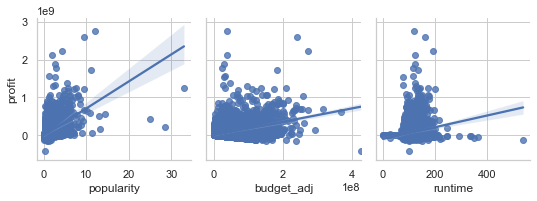

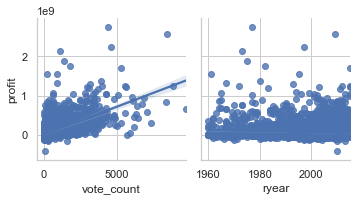

In [19]:
sns.pairplot(data=df1,
             x_vars=['popularity', 'budget_adj', 'runtime'],
             y_vars=['profit'],
             kind='reg');
sns.pairplot(data=df1,
             x_vars=['vote_count', 'ryear'],
             y_vars=['profit'],
             kind='reg');

We can conclude high profit has some other associations. Lets look out genre, director, and cast

#### Profit by Genre

Most of the movies have multiple genres and it has shown in one genre cell that genres have split by "|" character as it shown in <a href="#df1">here</a>. To calculate profit by each genre, first we need to seperate genre columns. In order to do that, split function with indexing is a simple solution. 

Reference : https://medium.com/@lsriniv/splitting-columns-of-series-dataframe-into-rows-step-by-step-explanation-9fce88ed1144

In [68]:
df1.isnull().sum()


popularity       0
budget           0
revenue          0
title            0
cast            11
director         4
runtime          0
genres           1
rdate            0
vote_count       0
vote_average     0
ryear            0
budget_adj       0
revenue_adj      0
profit           0
dtype: int64

After dropping zero budget movies from the dataset there is only one null movie left. There were 23 as we mentioned in "Data Cleaning" section. Now lets drop that 1 null entry from the dataframe.

In [69]:
df2 = df1.copy()

df2.dropna(subset=["genres"],inplace=True)

df2.isnull().sum()



popularity       0
budget           0
revenue          0
title            0
cast            11
director         4
runtime          0
genres           0
rdate            0
vote_count       0
vote_average     0
ryear            0
budget_adj       0
revenue_adj      0
profit           0
dtype: int64

In [70]:
df2 = (df1.set_index(df1.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df1.columns]
   
) 

df2.head(10)


,popularity,budget,revenue,title,cast,director,runtime,genres,rdate,vote_count,vote_average,ryear,budget_adj,revenue_adj,profit
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
1,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
2,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
3,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52,1254445953.24
4,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21
5,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Adventure,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21
6,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Science Fiction,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21
7,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Thriller,2015-05-13,6185,7.10,2015,137999939.28,348161292.49,210161353.21
8,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2015-03-18,2480,6.30,2015,101199955.47,271619025.41,170419069.94
9,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Science Fiction,2015-03-18,2480,6.30,2015,101199955.47,271619025.41,170419069.94


In [71]:
df2.shape

(13601, 15)

To measure effect of each genre of profit, we will be sure to eliminate outliers to observe how genres effect profit more accurutely. 



In [72]:
#Reference: https://kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

df2.drop(df2.columns.difference(["genres", "profit"]), axis=1, inplace=True)

df2.set_index(["genres"], inplace = True)

z_scores = stats.zscore(df2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df2 = df2[filtered_entries]



In [73]:
df2.head(10)

,profit
genres,
Action,210161353.21
Adventure,210161353.21
Science Fiction,210161353.21
Thriller,210161353.21
Adventure,170419069.94
Science Fiction,170419069.94
Thriller,170419069.94
Western,366114301.67
Drama,366114301.67


In [74]:
df2.shape

(13311, 1)

We had left 13311 entries in the dataset. Before removing outliers it was 13601. So 290 entries has identified as outlier and removed.

Each movie has a genre now. We have duplicated titles but it doesnt effect our "profit by genre" calculation.  

Next step is find mean profit by each genre:

In [75]:
#To find average profit made by each genre, groupby function will be used.

df2 = df2.reset_index().groupby(['genres'], as_index=False).mean()

df2.head()


,genres,profit
0,Action,66001055.04
1,Adventure,92080094.76
2,Animation,114683338.48
3,Comedy,52074551.64
4,Crime,44465335.40


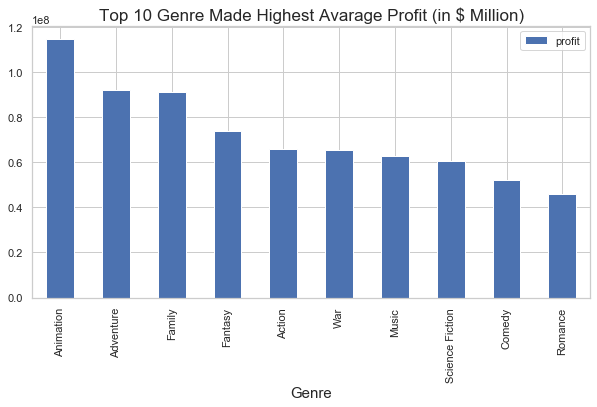

In [76]:
#Now, lets make a graph of top ten profitable genres.

ax = df2.nlargest(10,['profit']) . plot(kind = "bar", x="genres", y="profit")
ax.set_title("Top 10 Genre Made Highest Avarage Profit (in $ Million)",fontsize=17)
ax.set_xlabel("Genre",fontsize=15)

sns.set(rc={'figure.figsize':(12,4)})


#### Profit by Director

In [77]:
#Similiar process as we did in "Profit by Genre" section:

directors = df1.copy()

directors.dropna(subset=["director"],inplace=True)


directors.isnull().sum()

popularity       0
budget           0
revenue          0
title            0
cast            11
director         0
runtime          0
genres           1
rdate            0
vote_count       0
vote_average     0
ryear            0
budget_adj       0
revenue_adj      0
profit           0
dtype: int64

In [78]:



directors = (directors.set_index(directors.columns.drop('director',1).tolist())
   .director.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'director'})
   .loc[:, df1.columns]
   .groupby(['director'], as_index=False).mean()
   
) 



In [79]:
#drop unneccessary columns:

directors.drop(directors.columns.difference(["director", "profit"]), 1, inplace=True)

#First 10 column:

directors.head(10)

,director,profit
0,FrÃ©dÃ©ric Jardin,-2420239.87
1,A.R. Murugadoss,67755425.80
2,Aaron Blaise,-118534968.14
3,Aaron Harvey,-6785786.30
4,Aaron Norris,-1296875.25
5,Aaron Schneider,-7500000.00
6,Aaron Seelman,-7020250.15
7,Aaron Seltzer,26207385.32
8,Abbas Tyrewala,8912522.38
9,Abe Sylvia,-3944875.00


Text(0.5, 0, 'Directors')

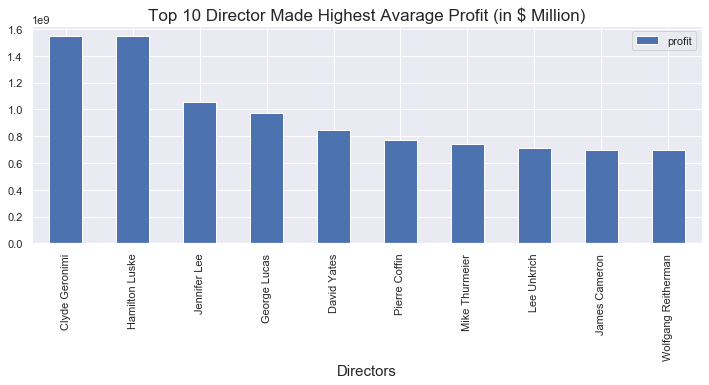

In [80]:
#Top ten director by profit


ax = directors.nlargest(10,['profit']) . plot(kind = "bar", x="director", y="profit")
ax.set_title("Top 10 Director Made Highest Avarage Profit (in $ Million)",fontsize=17)
ax.set_xlabel("Directors",fontsize=15)



#### Profit by Cast

In [81]:
#Similiar process as we did in "Profit by Genre" section:


cast1 = df1.copy()

cast1.dropna(subset=["cast"],inplace=True)


cast1.isnull().sum()

popularity      0
budget          0
revenue         0
title           0
cast            0
director        4
runtime         0
genres          1
rdate           0
vote_count      0
vote_average    0
ryear           0
budget_adj      0
revenue_adj     0
profit          0
dtype: int64

In [82]:


cast1 = (cast1.set_index(cast1.columns.drop('cast',1).tolist())
   .cast.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'cast'})
   .loc[:, df1.columns]
   .groupby(['cast'], as_index=False).mean()
   
) 

cast1.drop(cast1.columns.difference(["cast", "profit"]), 1, inplace=True)

cast1.head()



,cast,profit
0,"""Weird Al"" Yankovic",-8794924.70
1,50 Cent,8683735.31
2,A Martinez,-9331987.63
3,A. J. Langer,-9606557.05
4,A. Michael Baldwin,10190451.79


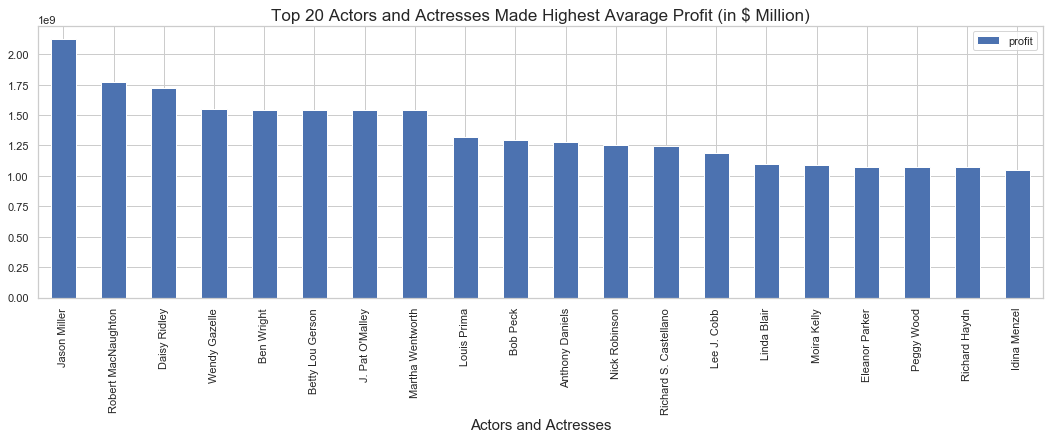

In [84]:
#Viusalizing top 20 actor & actress by profit

ax = cast1.nlargest(20,['profit']) . plot(kind = "bar", x="cast", y="profit")
ax.set_title("Top 20 Actors and Actresses Made Highest Avarage Profit (in $ Million)",fontsize=17)
ax.set_xlabel("Actors and Actresses",fontsize=15)


sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("whitegrid")

<a id='conclusions'></a>
## Conclusions

We have asked four questions above and after EDA, we can observe our findings. 


First question was about the most profitable movies. Top three of the most profitable movies are "Star Wars", "Avatar", and "Titanic" which not have so much in common.  

Second question was about total profits made by all movies. After the observation we can conclude that there is a clear positive trend in total profit made by movies after 1980s. Cause of this trend may connected with increase in number of new released movies in each year.

Third question was "How does popularity change according to the budget?" or in other words "Is there a correlation between budget and popularity.". After correlation analysis and observation we find a moderate poisitive relationship between budget and popularity. It can be concluded that a newly released movie with a huge budget is not necessarily will become popular. 

Last question was about the properties which associated with movies that have high profit. After analyses and observations, budget and popularity have moderate positive correlation with profit. However those are not strong correlations. So we have looked into other variables to understand what effects profit in real. Genres, director and cast is important. Animation, Adventure and Family are most prefitable 3 genres. Director is also important. When we looked at the past data, Clyde Geronimi and Hamilton Luske made relatively high profit among all other actors. In the same context, actors and actresses also is an important component of profit.

